In [1]:
import itertools
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import functools 
from itertools import product
import sys
sys.path.append('../Environments/')
from ColoredGridWorld import SetUpInferenceSpace as setUp
from ColoredGridWorld import OBMDP
from ColoredGridWorld import visualizations
sys.path.append('../Algorithms/')
from ActionInterpretation import ActionInterpretation
from ActionInterpretationEveryStep import ActionInterpretationEveryStep

In [2]:
dimensions = (5,6)
goals = [(5,2)]
informativeBeliefGoals = [True, False]
actions = [(-1,0),(0,1),(0,-1),(1,0)]
goalNameDictionary = {(5,2):'goal'}
stateSpace = {(0,0): 'white',(0,1): 'white',(0,2): 'white',(0,3): 'white',(0,4): 'white', (1,0): 'blue',(1,1): 'orange', (1,2):'orange',(1,3):'orange',(1,4):'orange', (2,0): 'blue',(2,1):'purple', (2,2):'purple', (2,3):'purple', (2,4):'orange', (3,0): 'blue',(3,1):'purple',(3,2): 'blue',(3,3):'purple',(3,4):'orange', (4,0): 'blue', (4,1): 'blue', (4,2): 'blue',(4,3):'purple', (4,4):'orange', (5,0):'white',(5,1):'white', (5,2):'yellow', (5,3):'white', (5,4):'white'}
convergenceTolerance = 10e-7
gamma = 0.94
alpha = 20
eps = 0.01
hyperparameters = (convergenceTolerance, gamma, alpha, eps)
variableColours = ['orange', 'purple', 'blue']
variableReward = [0, -2]
constantRewardDict = {'white': 0, 'yellow': 10}


utilitySpace = setUp.buildUtilitySpace(variableColours, variableReward, constantRewardDict)
transitionSpace = [True]
worlds = setUp.buildWorldSpace(utilitySpace, transitionSpace)
envSpace = [(world, goal) for world, goal in product(worlds, goals)]
envMDPsAndPolicies = setUp.buildEnvPolicySpace(dimensions, stateSpace, actions, envSpace, hyperparameters)
actionInterpretation = ActionInterpretation(envMDPsAndPolicies)


beta = 10
beliefGamma = 0.95
beliefAlpha = 20
beliefEps = 0.05
beliefHyperparameters = (convergenceTolerance, beta, beliefGamma, beliefAlpha, beliefEps)
bins = [0,0.25,0.5,0.75,1]
beliefSpacePossible = [{key:value for key, value in zip(envSpace, permutations)} for permutations in product(bins, repeat = len(envSpace))]
discreteBeliefSpace = [beliefDict for beliefDict in beliefSpacePossible if (sum(value for value in beliefDict.values())==1)]
hashableDiscreteBeliefSpace = [setUp.HashableBelief(beliefDict) for beliefDict in discreteBeliefSpace]
uniformPriorBelief = setUp.HashableBelief({(setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               })
hashableDiscreteBeliefSpace.append(uniformPriorBelief)
beliefUtilityFn = OBMDP.getBeliefUtility()
literalObserver = OBMDP.LiteralObserver(actionInterpretation, discreteBeliefSpace)
getNextBelief = literalObserver.getNextDiscreteBelief
jointStateSpace = list(product(stateSpace.keys(), hashableDiscreteBeliefSpace))

envOBMDPsAndPolicies = setUp.buildPragmaticEnvPolicySpace(jointStateSpace, actions, envMDPsAndPolicies, getNextBelief, beliefHyperparameters)
priors = {(env): (1/len(envSpace)) for env in envSpace}
hashablePriors = setUp.HashableBelief(priors)

In [3]:
inference = ActionInterpretation(envOBMDPsAndPolicies)  
#first few steps of the most-likely trajectory for OXO
trajectory = [ ((0,2), setUp.HashableBelief({(setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               })), (0,1), ((0,3), setUp.HashableBelief({(setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.25, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.25, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0.25,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.25,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               })), (0,-1), ((0,2), setUp.HashableBelief({(setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.25, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.25, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0.25,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.25,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               })), (0,-1), ((0,1), setUp.HashableBelief({(setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 1, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               })) ]
testWorld2 = setUp.HashableWorld({'white': 0, 'orange': -2, 'purple': -2, 'blue':-2, 'yellow': 10} ,True)
testWorld = setUp.HashableWorld({'white': 0, 'orange': 0, 'purple': 0, 'blue':0, 'yellow': 10} ,True)
Probab = inference(trajectory, hashablePriors, testWorld, goals[0], False)
Probab2 = inference(trajectory, hashablePriors, testWorld2, goals[0], False)
beliefVector = inference(trajectory, hashablePriors)
beliefVectorDict = beliefVector()
for env, prob  in beliefVectorDict.items():
    print(env[0](), env[1], prob)
print("Probability of the given world1 and goal for trajectory is " + str(Probab))
print("Probability of the given world2 and goal for trajectory is " + str(Probab2))

{'orange': 0, 'purple': 0, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 8.220628279135905e-05
{'orange': 0, 'purple': 0, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.00016059878243594345
{'orange': 0, 'purple': -2, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.9612092355400144
{'orange': 0, 'purple': -2, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.00016233731385442333
{'orange': -2, 'purple': 0, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.012460340562616253
{'orange': -2, 'purple': 0, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.012499480385391799
{'orange': -2, 'purple': -2, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.012461186271767575
{'orange': -2, 'purple': -2, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.0009646148611281587
Probability of the given world1 and goal for trajectory is 8.220628279135905e-05
Probability of the given world2 and goal for trajectory is 0.0009646148611281587


In [4]:
#first step for XOO
trajectory2 = [((0,2), setUp.HashableBelief({(setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.125, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0.125,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0.125,
                                               })), (0,-1), ((0,1), setUp.HashableBelief({(setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0, 
                                               (setUp.HashableWorld({'orange':0, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':0, 'yellow':10}, True),(5,2)): 0.5,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':0, 'purple':-2, 'yellow':10}, True),(5,2)): 0.5,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':0, 'yellow':10}, True),(5,2)): 0,
                                               (setUp.HashableWorld({'orange':-2, 'white':0, 'blue':-2, 'purple':-2, 'yellow':10}, True),(5,2)): 0,
                                               }))]
beliefVector = inference(trajectory2, hashablePriors)
beliefVectorDict = beliefVector()
for env, prob  in beliefVectorDict.items():
    print(env[0](), env[1], prob)

{'orange': 0, 'purple': 0, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.006250000000000001
{'orange': 0, 'purple': 0, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.006250000000000001
{'orange': 0, 'purple': -2, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.006250000000000001
{'orange': 0, 'purple': -2, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.006250000000000001
{'orange': -2, 'purple': 0, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.48125
{'orange': -2, 'purple': 0, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.006250000000000001
{'orange': -2, 'purple': -2, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.48125
{'orange': -2, 'purple': -2, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.006250000000000001


In [5]:
inference = ActionInterpretationEveryStep(envOBMDPsAndPolicies)  
envPosteriorsEveryStep = inference(trajectory, hashablePriors)

In [6]:
orderOfTrapColours = ('orange', 'purple', 'blue')
D = setUp.mapEnvToLabel(envPosteriorsEveryStep, orderOfTrapColours)

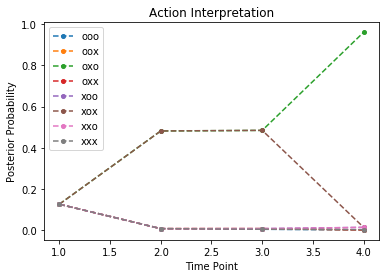

In [7]:
visualizations.plotProbAtEachStep(D, "Action Interpretation")

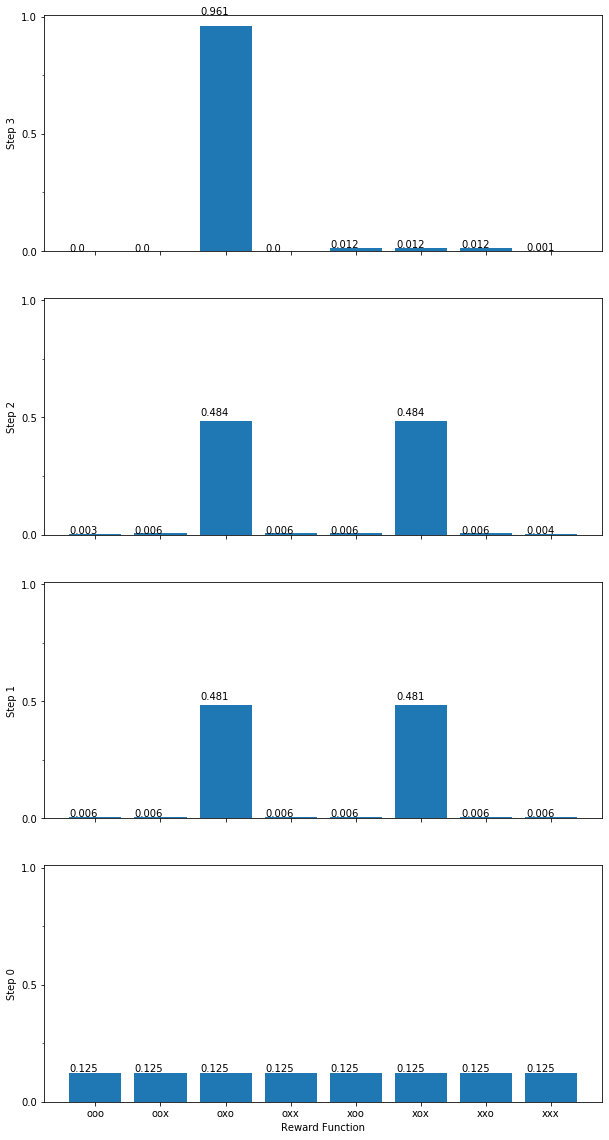

In [8]:
v = [dict(zip(D,t)) for t in zip(*D.values())]
visualizations.plotDictAtEachStep(v, showHeight = True)